In [1]:
# Import packages

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


import gc #Garbage Collector interface
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import Google Drive 套件
from google.colab import drive

# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 透過 gdrive/My Drive/... 來存取檔案
data_df = pd.read_csv('gdrive/My Drive/TEJ_Whole_year_Jieba.csv')

In [4]:
data_df.head()

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容,content_tokenized
0,1218,泰山,20190101,6(2018/09),0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。,發言 人 林俐婉 內部 調動 由 江巍峰 接任
1,1503,士電,20190101,4(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。,內部 稽核 主管 林志強 內部 調動 由 莊文清 接任
2,1504,東元,20190101,4(2018/09),0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。,會計 主管 藍俊雄 內部 調動 由 林鴻名 接任
3,1709,和益,20190101,5(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。,內部 稽核 主管 游本 詮內部 調動 由 曾筱茜 接任
4,1721,三晃,20190101,7(2018/09),0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。,財務 經理 洪廷宜 內部 調動 由 王婷渝 接任


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   個股代號               23703 non-null  int64 
 1   公司簡稱               22775 non-null  object
 2   事件日                23703 non-null  int64 
 3   TCRI(年/月)          23703 non-null  object
 4   事件強度               23703 non-null  int64 
 5   大事件類別              23703 non-null  object
 6   小事件類別              23703 non-null  object
 7   事件內容               23703 non-null  object
 8   content_tokenized  23703 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.6+ MB


In [6]:
# Data pre-processing

import keras
MAX_NUM_WORDS = 10000
tokenizer = keras .preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)

corpus = data_df.content_tokenized

tokenizer.fit_on_texts(corpus)

x = tokenizer.texts_to_sequences(corpus)

len(x)

x[:1]

for seq in x[:1]:
    print([tokenizer.index_word[idx] for idx in seq])
    
for seq in x[:20]:
    print(len(seq), seq[:5], ' ...')
    
max_seq_len = max([
    len(seq) for seq in x])

max_seq_len

MAX_SEQUENCE_LENGTH = 150

Using TensorFlow backend.


['發言', '人', '內部', '調動', '由', '接任']
6 [458, 36, 83, 142, 29]  ...
7 [83, 378, 138, 83, 142]  ...
6 [422, 138, 83, 142, 29]  ...
6 [83, 378, 138, 142, 29]  ...
6 [126, 162, 83, 142, 29]  ...
6 [294, 138, 83, 142, 29]  ...
7 [2598, 246, 29, 87, 246]  ...
13 [460, 10, 85, 4, 6171]  ...
7 [554, 10, 85, 64, 4]  ...
6 [62, 162, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
225 [3046, 848, 2288, 1386, 48]  ...
17 [460, 10, 85, 4, 6843]  ...
8 [422, 138, 83, 142, 29]  ...
6 [126, 162, 83, 142, 29]  ...
6 [422, 138, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
6 [294, 138, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...


In [0]:
x = keras .preprocessing .sequence .pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)

# Predict "事件強度"

In [0]:
y = data_df["事件強度"]

In [0]:
# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
y_train.value_counts()

-1    8557
 0    6722
 1    2807
-2     521
-3     219
 2      76
 3      60
Name: 事件強度, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_te

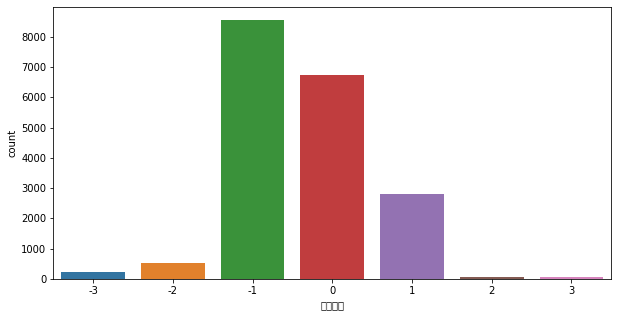

In [12]:
# Visualize the proportion of each target class

plt.figure(figsize=(10,5))
sns.countplot(y_train)

In [0]:
# Calculate class weight

# Let's import the module first
from sklearn.utils import class_weight

# In order to calculate the class weight do the following
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

In [0]:
# Convert dataframes to numpy arrays

y_train = np.asarray(pd.get_dummies(y_train))
y_test = np.asarray(pd.get_dummies(y_test))

## Model 1 : Predict 7 classes:

25000 features

30 epochs

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 8s 532us/step - loss: 1.6289 - accuracy: 0.5428 - val_loss: 1.0973 - val_accuracy: 0.6359
Epoch 2/30
15169/15169 [==============================] - 8s 509us/step - loss: 0.8955 - accuracy: 0.7145 - val_loss: 0.7437 - val_accuracy: 0.7395
Epoch 3/30
15169/15169 [==============================] - 8s 508us/step - loss: 0.5848 - accuracy: 0.8155 - val_loss: 0.5572 - val_accuracy: 0.8281
Epoch 4/30
15169/15169 [==============================] - 8s 501us/step - loss: 0.4233 - accuracy: 0.8753 - val_loss: 0.4937 - val_accuracy: 0.8416
Epoch 5/30
15169/15169 [==============================] - 8s 521us/step - loss: 0.3334 - accuracy: 0.9017 - val_loss: 0.4803 - val_accuracy: 0.8442
Epoch 6/30
15169/15169 [==============================] - 8s 518us/step - loss: 0.2744 - accuracy: 0.9205 - val_loss: 0.4759 - val_accuracy: 0.8492
Epoch 7/30
15169/15169 [==============================] - 8s 52

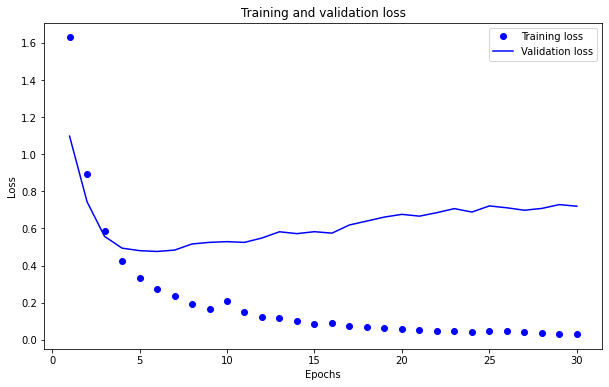

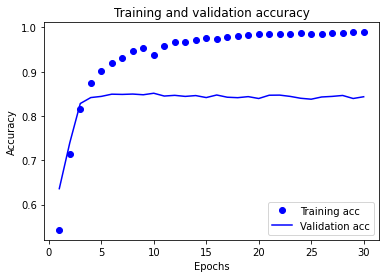

In [16]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 631us/step
[0.705484966994388, 0.8521409034729004]


# Model 2: Predict 7 classes: Dropout 0.2

25000 features

30 epochs

drop = 0.2, recurrent_dropout=0.2: testing dataset: %

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 9s 578us/step - loss: 1.5889 - accuracy: 0.4503 - val_loss: 1.1791 - val_accuracy: 0.4540
Epoch 2/30
15169/15169 [==============================] - 8s 547us/step - loss: 1.0029 - accuracy: 0.6432 - val_loss: 0.8137 - val_accuracy: 0.7163
Epoch 3/30
15169/15169 [==============================] - 8s 560us/step - loss: 0.7108 - accuracy: 0.7536 - val_loss: 0.5970 - val_accuracy: 0.8094
Epoch 4/30
15169/15169 [==============================] - 8s 559us/step - loss: 0.5229 - accuracy: 0.8402 - val_loss: 0.4972 - val_accuracy: 0.8336
Epoch 5/30
15169/15169 [==============================] - 8s 560us/step - loss: 0.4143 - accuracy: 0.8708 - val_loss: 0.4659 - val_accuracy: 0.8394
Epoch 6/30
15169/15169 [==============================] - 8s 553us/step - loss: 0.3508 - accuracy: 0.8881 - val_loss: 0.4532 - val_accuracy: 0.8397
Epoch 7/30
15169/15169 [==============================] - 8s 55

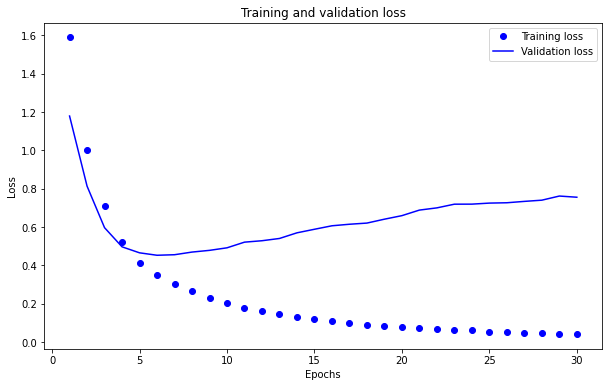

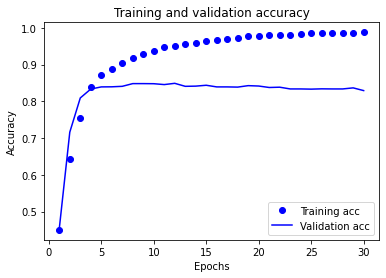

In [22]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2)) # Note we use "dropout" technique here.
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 712us/step
[0.7293779332284257, 0.8422273993492126]


# Model 3: Predict 7 classes: Dropout 0.5

25000 features

30 epochs

drop = 0.5, recurrent_dropout=0.5: testing dataset: %

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 9s 592us/step - loss: 1.6709 - accuracy: 0.5647 - val_loss: 1.0918 - val_accuracy: 0.6736
Epoch 2/30
15169/15169 [==============================] - 8s 552us/step - loss: 1.0350 - accuracy: 0.6366 - val_loss: 0.8451 - val_accuracy: 0.6878
Epoch 3/30
15169/15169 [==============================] - 8s 550us/step - loss: 0.7752 - accuracy: 0.7225 - val_loss: 0.6571 - val_accuracy: 0.7361
Epoch 4/30
15169/15169 [==============================] - 8s 554us/step - loss: 0.5928 - accuracy: 0.8001 - val_loss: 0.5333 - val_accuracy: 0.8220
Epoch 5/30
15169/15169 [==============================] - 9s 565us/step - loss: 0.4846 - accuracy: 0.8445 - val_loss: 0.4959 - val_accuracy: 0.8292
Epoch 6/30
15169/15169 [==============================] - 8s 553us/step - loss: 0.4279 - accuracy: 0.8583 - val_loss: 0.4844 - val_accuracy: 0.8373
Epoch 7/30
15169/15169 [==============================] - 8s 55

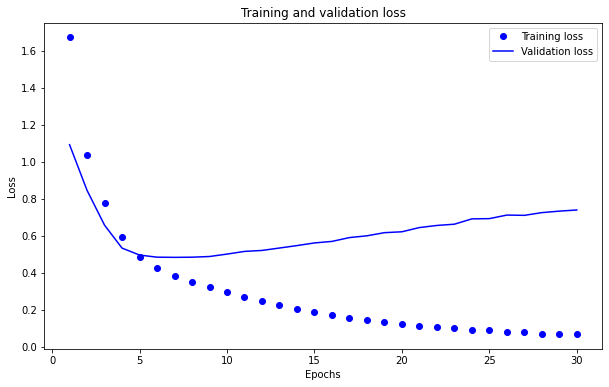

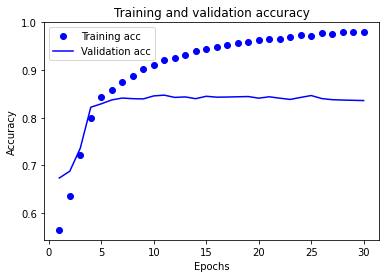

In [19]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32,dropout=0.5, recurrent_dropout=0.5)) # Note we use "dropout" technique here.
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 694us/step
[0.7284191230701335, 0.8428601622581482]


# 預測大事件類別

dropout 0.2
recurrent dropout 0.2
testing dataset accuracy: 96%

In [0]:
y = np.asarray(data_df["大事件類別"])

y = np.asarray(pd.get_dummies(y))

# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
y = data_df["大事件類別"]

In [0]:
# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
y_train.value_counts()

I_產業前景       12111
M_經營層         4856
F_市場交易        1176
R_危機           410
A_會計/財報分析      409
Name: 大事件類別, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26223 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29151 missing from current font.
  font.set_

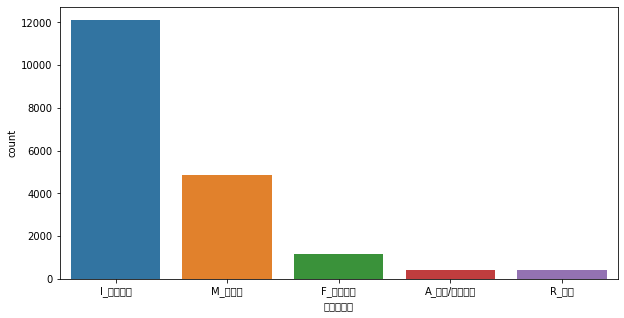

In [36]:
# Visualize the proportion of each target class

plt.figure(figsize=(10,5))
sns.countplot(y_train)

In [0]:
# Calculate class weight

# Let's import the module first
from sklearn.utils import class_weight

# In order to calculate the class weight do the following
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

In [0]:
# Convert dataframes to numpy arrays

y_train = np.asarray(pd.get_dummies(y_train))
y_test = np.asarray(pd.get_dummies(y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 9s 591us/step - loss: 1.2693 - accuracy: 0.7306 - val_loss: 0.6252 - val_accuracy: 0.8228
Epoch 2/30
15169/15169 [==============================] - 9s 567us/step - loss: 0.4988 - accuracy: 0.8680 - val_loss: 0.3340 - val_accuracy: 0.9185
Epoch 3/30
15169/15169 [==============================] - 9s 570us/step - loss: 0.2876 - accuracy: 0.9281 - val_loss: 0.2380 - val_accuracy: 0.9309
Epoch 4/30
15169/15169 [==============================] - 8s 559us/step - loss: 0.2052 - accuracy: 0.9445 - val_loss: 0.2002 - val_accuracy: 0.9407
Epoch 5/30
15169/15169 [==============================] - 9s 568us/step - loss: 0.1590 - accuracy: 0.9566 - val_loss: 0.1862 - val_accuracy: 0.9475
Epoch 6/30
15169/15169 [==============================] - 9s 566us/step - loss: 0.1303 - accuracy: 0.9651 - val_loss: 0.1753 - val_accuracy: 0.9518
Epoch 7/30
15169/15169 [==============================] - 9s 56

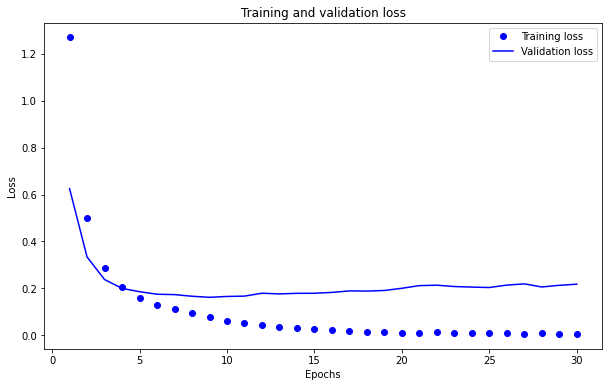

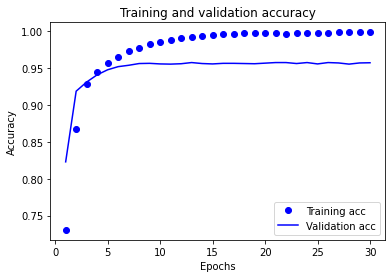

In [43]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2)) # Note we use "dropout" technique here.
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 708us/step
[0.1856203747068942, 0.9630879759788513]


# 預測小事件類別

dropout 0.2
recurrent dropout 0.2
testing dataset accuracy: 83%

In [0]:
y = data_df["小事件類別"]

In [0]:
# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
y_train.value_counts()

IS01_營收變動或客戶/商品/通路策略    7645
MT02_董監異動               1618
MT06_高管異動               1533
IP01_成本/產能變動或資本支出       1515
IF02_投資/併購/組織策略         1373
                        ... 
MC03_工安問題                  1
MF02_股權快速稀釋                1
MO03_董監持股未達規定比例            1
4D_客戶及產品－暴險                1
7D_作業流程－帳戶管理               1
Name: 小事件類別, Length: 97, dtype: int64

In [0]:
# Visualize the proportion of each target class

plt.figure(figsize=(10,5))
sns.countplot(y_train)

In [0]:
# Calculate class weight

# Let's import the module first
from sklearn.utils import class_weight

# In order to calculate the class weight do the following
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

In [0]:
# Convert dataframes to numpy arrays

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [0]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc.fit(np.asarray(y).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 9s 611us/step - loss: 4.1600 - accuracy: 0.3951 - val_loss: 3.2887 - val_accuracy: 0.4057
Epoch 2/30
15169/15169 [==============================] - 9s 586us/step - loss: 2.7970 - accuracy: 0.4025 - val_loss: 2.4834 - val_accuracy: 0.4057
Epoch 3/30
15169/15169 [==============================] - 9s 571us/step - loss: 2.3792 - accuracy: 0.4025 - val_loss: 2.2686 - val_accuracy: 0.4057
Epoch 4/30
15169/15169 [==============================] - 9s 570us/step - loss: 2.1505 - accuracy: 0.4364 - val_loss: 2.0132 - val_accuracy: 0.4867
Epoch 5/30
15169/15169 [==============================] - 9s 567us/step - loss: 1.8945 - accuracy: 0.5089 - val_loss: 1.7759 - val_accuracy: 0.5724
Epoch 6/30
15169/15169 [==============================] - 9s 565us/step - loss: 1.6482 - accuracy: 0.6099 - val_loss: 1.5435 - val_accuracy: 0.6583
Epoch 7/30
15169/15169 [==============================] - 8s 55

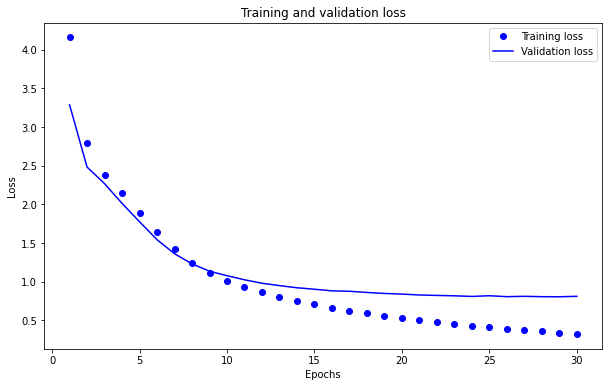

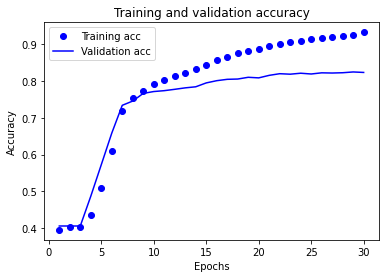

In [100]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2)) # Note we use "dropout" technique here.
model.add(layers.Dense(99, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [101]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 717us/step
[0.7077541845907418, 0.8377979397773743]
